In [1]:
from monai.transforms import Compose, LoadImage, CutMix, ToTensor
from monai.data import Dataset, DataLoader

In [2]:
import sys
from torch.utils.data import DataLoader

sys.path.append("..")
from data.dataset import FramesDataset

In [3]:
model_path = "weights/2024-03-19_14-40-10_epoch:6_run-id:jhb95v3s_val-loss:0.1636328101158142.pth"
test_data_path = "/Volumes/LaCie/Macbook/Bachelor/CrossValidation/"
test_data_json = "metadata_folds/kkui-lung-bline-lumify:latest/video/fold_0.json"

In [9]:
from torchvision.transforms import RandomAffine

def plot_images(orig_images, aug_images, n_images=8):
    fig, axs = plt.subplots(2, n_images, figsize=(20, 5))
    for i in range(n_images):
        
        axs[0, i].imshow(RandomAffine(15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10)(orig_images[i]).permute(1, 2, 0), cmap="gray")
        axs[0, i].axis('off')
        axs[1, i].imshow(aug_images[i].permute(1, 2, 0), cmap="gray")
        axs[1, i].axis('off')
    plt.show() 

In [10]:
from torchvision import transforms
import matplotlib.pyplot as plt
from monai.transforms import MixUp

# Define the transform
transform = transforms.Compose([
    transforms.Resize((600, 600))
])


test_dataset = FramesDataset(test_data_json, test_data_path,init_transform=transform , target_transform=None,
                             output_transform=None, subset="test")
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

images_list = []
labels_list = []

cm = CutMix(batch_size=8, alpha=0.5)

for images, labels in test_loader:
    
    in_int = images.int()
    
    augimg, auglabels = cm(in_int, labels)
    
    plot_images(in_int, in_int, labels, auglabels)
    

    

    
    
        

RuntimeError: [Errno 2] No such file or directory: '/Volumes/LaCie/Macbook/Bachelor/CrossValidation/cropped/video_frames/012_image_36801179580177.mp4/frame_2.png'

In [11]:
import monai.transforms as Tr

In [12]:
from monai.transforms import Compose, LoadImage, CutMix, ToTensor
from monai.data import Dataset, DataLoader


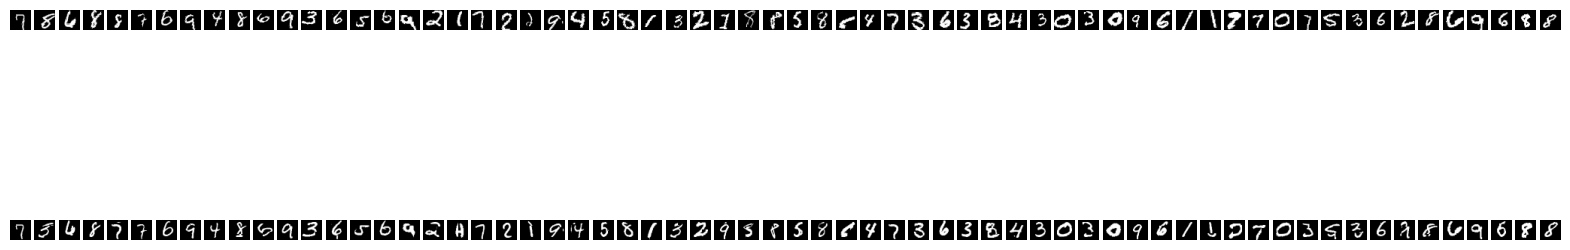

tensor([7, 8, 6, 8, 8, 7, 6, 9, 4, 8, 6, 9, 3, 6, 5, 6, 9, 2, 1, 7, 2, 2, 9, 4,
        5, 8, 1, 3, 2, 1, 8, 8, 5, 8, 6, 4, 7, 3, 6, 3, 8, 4, 3, 0, 3, 0, 9, 6,
        1, 1, 9, 7, 0, 7, 5, 3, 6, 2, 8, 6, 9, 6, 8, 8])


NameError: name 'auglabels' is not defined

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor
from monai.transforms import CutMix, RandAffine

# Step 1: Prepare the MNIST dataset with standard torchvision transforms
transform = Compose([ToTensor()])
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)

# Step 2: Define the CutMix transform
# lambda_param determines the size of the patch from the second image, alpha controls the mix ratio
cutmix = CutMix(batch_size=64, alpha=0.2)

# Since CutMix is a batch-level transform, we need to create a custom collate function that applies CutMix
def cutmix_collate(batch):
    images, targets = zip(*batch)
    images = torch.stack(images)
    targets = torch.tensor(targets)
    images, targets = cutmix(images, targets)
    return images, targets

# Step 3: Create DataLoader with custom collate function
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


# Example: Iterate through DataLoader and process the batches
for images, targets in train_loader:
    
    augimg = cutmix(images)
    
    
    
    plot_images(images, augimg, n_images=64)
    print(targets)
    print(auglabels)
    break


In [16]:
from torchvision.transforms import RandomCrop

# The input string
input_string = "RandomCrop(size=(200, 200))"

# Directly using eval() - use cautiously!
# Ensure your environment is controlled and the input is trusted to avoid security risks.
transform = eval(input_string)

type(transform)

torchvision.transforms.transforms.RandomCrop